# **EDA Part 1** *Part 1*
### **Auther:** *Sarim Zahid Saeed*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
# Data from seaborn
df = sns.load_dataset('titanic')

### Let's feel the Data:
*   Composition of Data
*   Distributions of Data
*   Comparisons
*   Relations

## Data Composition:

In [4]:
# Data Composition:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df.pclass.unique()

array([3, 1, 2], dtype=int64)

In [9]:
# 2 values: Binary
# 3 values: Ordinal / Nominal(Name)
# Multiple Values: Numeric

df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [10]:
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [11]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [12]:
df['age'].max()

80.0

### Finding Max age where 'who' equals child:

In [ ]:
df[df['who'] == 'child']['age'].max()

15.0

In [ ]:
df[df['who'] == 'child']['age'].min()

0.42

### Spliting age column:
#### The Concept of binning..
* Bins:
    * 0-5
    * 6-12
    * 13-18
    * 19-40
    * Greater than 40

In [13]:
# Creating bin edges
bins = [0,5,10,15,18,40,80]
lables = ['0-5','6-10','11-15','16-18','19-40','41-80']

# Add new column:

df["age_groups"] = pd.cut(df['age'], bins = bins, labels = lables)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,19-40
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,19-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,19-40
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,19-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,19-40


In [14]:
df['age_groups'].value_counts()

19-40    425
41-80    150
16-18     56
0-5       44
6-10      20
11-15     19
Name: age_groups, dtype: int64

## Creating a pivot table:

In [15]:
df.groupby('sex')['age_groups'].value_counts().unstack()

age_groups,0-5,6-10,11-15,16-18,19-40,41-80
sex,,,,,,
female,21,10,12,25,145,48
male,23,10,7,31,280,102


In [16]:
df.groupby('who')['age_groups'].value_counts().unstack()

age_groups,0-5,6-10,11-15,16-18,19-40,41-80
who,,,,,,
child,44,20,19,0,0,0
man,0,0,0,31,280,102
woman,0,0,0,25,145,48


## Summarizing on the basis of Class:

In [19]:
df.groupby('who')[['age_groups','class']].value_counts().unstack()

class             First  Second  Third
who   age_groups                      
child 0-5             3      13     28
      6-10            0       4     16
      11-15           3       2     14
      16-18           0       0      0
      19-40           0       0      0
      41-80           0       0      0
man   0-5             0       0      0
      6-10            0       0      0
      11-15           0       0      0
      16-18           2       6     23
      19-40          46      63    171
      41-80          50      21     31
woman 0-5             0       0      0
      6-10            0       0      0
      11-15           0       0      0
      16-18           8       4     13
      19-40          48      47     50
      41-80          26      13      9

In [20]:
df.groupby('who')[['survived','class']].value_counts().unstack()

class           First  Second  Third
who   survived                      
child 0             1       0     33
      1             5      19     25
man   0            77      91    281
      1            42       8     38
woman 0             2       6     58
      1            89      60     56

In [21]:
df.groupby('who')[['survived','alone']].value_counts().unstack()

alone           False  True 
who   survived              
child 0            32      2
      1            45      4
man   0           103    346
      1            24     64
woman 0            40     26
      1           110     95

## Null Values:

In [22]:
# Finding missing values:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_groups     177
dtype: int64

In [23]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
age_groups     19.865320
dtype: float64

# Imputing Null Values (If less than 50% else drop the column.):
#### Methods and techniques to impute missing values in python DataFrames:

## Drop missing values:
- drop rows with any NaNs in them.

## 1. Fill 'na' with Mode (In case of categorical vlue columns):

In [ ]:
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace= True)

In [41]:
df["embarked"].fillna(df["embarked"].mode()[0], inplace= True)

In [40]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

## 2. Fill na using Mean or Median (In case of numerical value columns like 'age' here.):
#### Mean/Median Imputation:
- The mean or median of the column is used to replace null values in that particular column. This can be done by using pandas fillna.

In [42]:
df["age"].fillna(df["age"].mean(), inplace= True)

In [43]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### All the missing values have been removed!!

#### Other ways for Null value imputation:
## 3. Replacing with constant value:
- Replace all null values in Age column by 10.

In [ ]:
# df['age'].fillna(value=10, inplace= True)

## 4. Linear Interpolation:
- Fill in missing values with the average of non-missing values on either side (i.e., linear interpolation).

In [ ]:
# df['age'].interpolate(method= 'linear', inplace= True)

## 5. KNN Imputation:
- Use k nearest neighbors to predict a value for an unknown data point based on its known neighboring points, and then replace it with this predicted.

In [ ]:
#   from sklearn.impute import KNNImputer
#   imputer = KNNImputer(n_neighbours= 5)
#   df['age'] = imputer.fit_transform(df['age'])

## 6. Multivariate Imputation:
- Missing values are replaced by the mean of each column.

In [ ]:
#   from sklearn.experimental import enable_iterative_imputer
#   from sklearn.impute import IterativeImputer
#   imputer = IterativeImputer(max_iter= 10, random_state= 0)
#   df['age'] = imputer.fit_transform(df['age'])

## Data Visualization:

In [24]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_groups'],
      dtype='object')

<Axes: xlabel='age', ylabel='fare'>

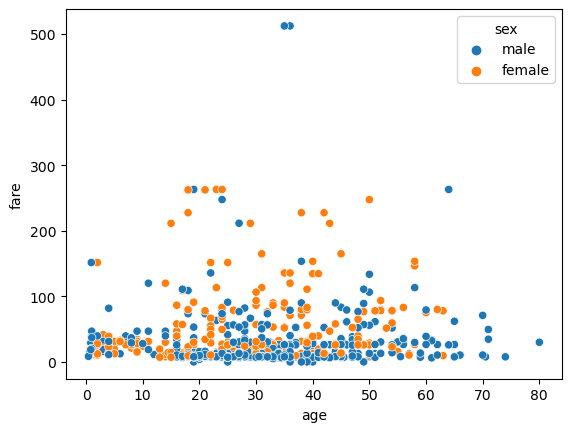

In [25]:
sns.scatterplot(data = df, x = 'age', y = 'fare', hue = 'sex')

<Axes: xlabel='age', ylabel='fare'>

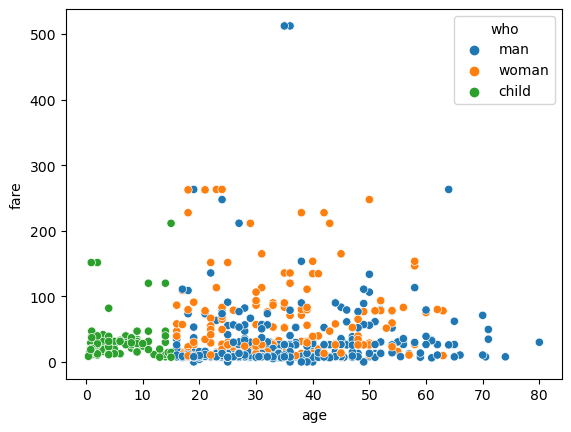

In [26]:
sns.scatterplot(data = df, x = 'age', y = 'fare', hue = 'who')

<Axes: xlabel='age', ylabel='fare'>

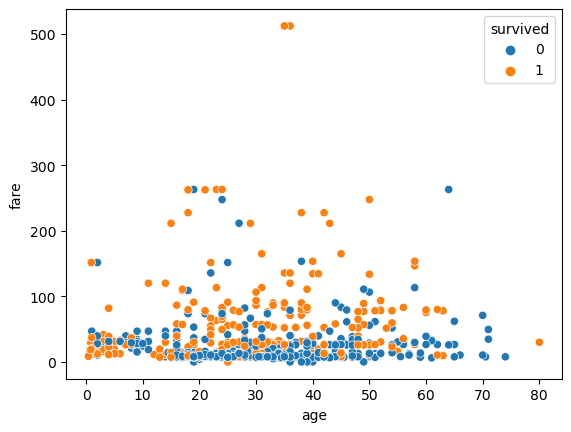

In [27]:
sns.scatterplot(data = df, x = 'age', y = 'fare', hue = 'survived')

<Axes: xlabel='who', ylabel='fare'>

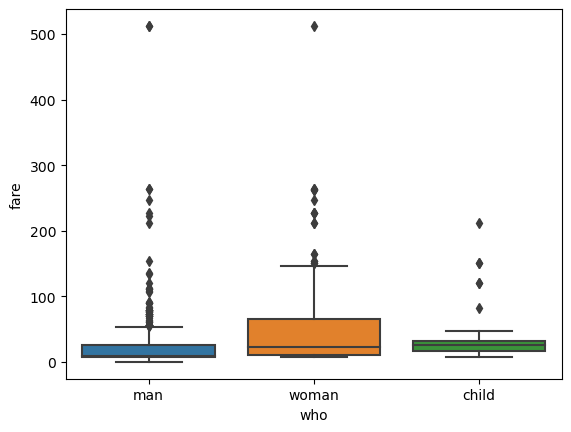

In [28]:
sns.boxplot(data = df, x = 'who', y = 'fare')

In [30]:
fig = px.scatter(df, x = "age", y = "fare", color= "sex")
fig.show()

In [ ]:
fig = px.box(df, x = "survived", y = "fare", color= "who")
fig.show()

# Distributions:

<Axes: xlabel='fare', ylabel='Count'>

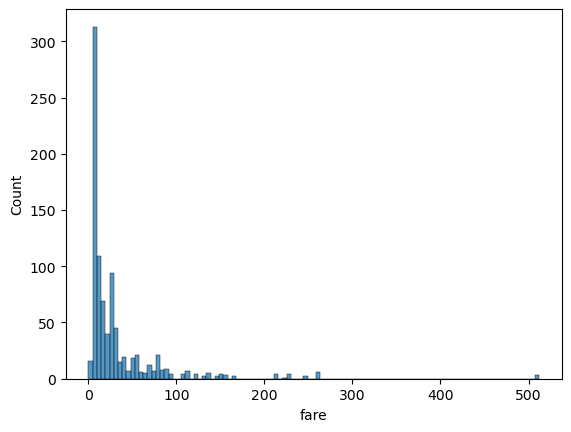

In [49]:
sns.histplot(df, x = 'fare')

<Axes: xlabel='age', ylabel='Count'>

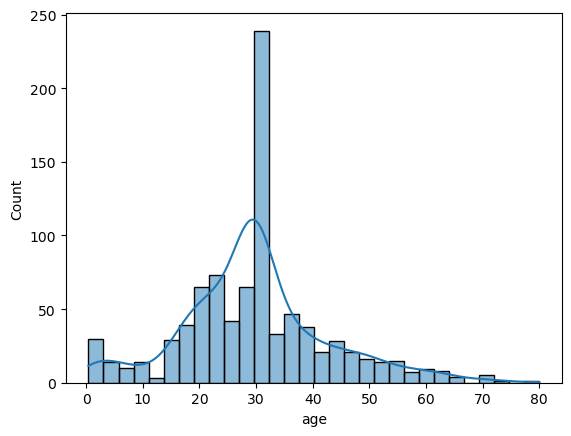

In [52]:
sns.histplot(df, x = 'age', kde= True)

## Shapiro wilk test to check distribution:

In [53]:
# Shapiro wilk test

from scipy.stats import shapiro
# removing missing values

age_data = df["age"].dropna()

stat, p = shapiro(age_data)
print("Statistics: ", stat)
print("p_value: ", p)

# Interpretation
alpha = 0.05 # significance level
if (p > alpha):
    print('Sample looks normally distributed.')
else:
    print('Sample does not have Gaussian distribution.')

Statistics:  0.9588214159011841
p_value:  3.972714542180072e-15
Sample does not have Gaussian distribution.
